In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [161]:
df = pd.read_csv('survey_results_public.csv')

In [162]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [163]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [164]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [165]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [167]:
df = df.drop(df[df.isna().sum(axis=1)>0].index,axis=0)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0


In [168]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [169]:
df = df[df['Employment']=='Employed full-time']
df = df.drop('Employment',axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [170]:
#count_countries = df.Country.value_counts(normalize=True)
#low_count_countries= count_countries[(count_countries<0.01)==True].index


In [171]:
#for x in low_count_countries:
#    df.loc[df[df['Country']==x].index,'Country']='Others'

In [172]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [173]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [174]:
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

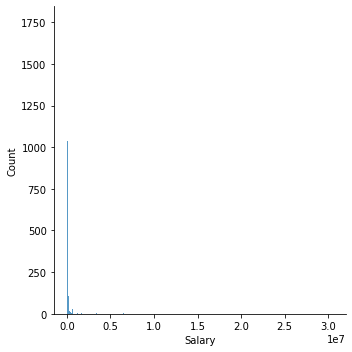

In [175]:
sns.displot(x=df.Salary)
plt.show()

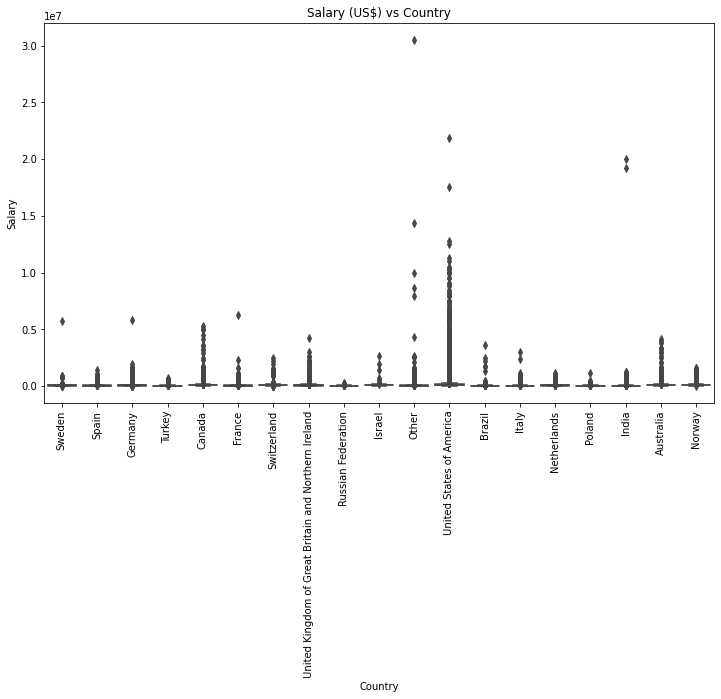

In [176]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Salary',x='Country',data=df)
plt.title('Salary (US$) vs Country')
plt.xticks(rotation=90)
plt.show()

In [177]:
(df[df['Country']=='United States of America']['Salary'].describe(percentiles =[0,0.95] ))


count    9.175000e+03
mean     2.650845e+05
std      8.446518e+05
min      1.000000e+00
0%       1.000000e+00
50%      1.250000e+05
95%      4.500000e+05
max      2.182225e+07
Name: Salary, dtype: float64

In [178]:
(df[df['Country']=='United States of America']['Salary'].describe(percentiles =[0,0.95] ))[6]

450000.0

In [179]:
high=0
for i in df['Country'].unique():
    temp = (df[df['Country']==i]['Salary'].describe(percentiles =[0,0.95] ))[6]
    if temp>high:
        high=temp

In [180]:
df = df[(df['Salary']>=1000)&(df['Salary']<=high)]

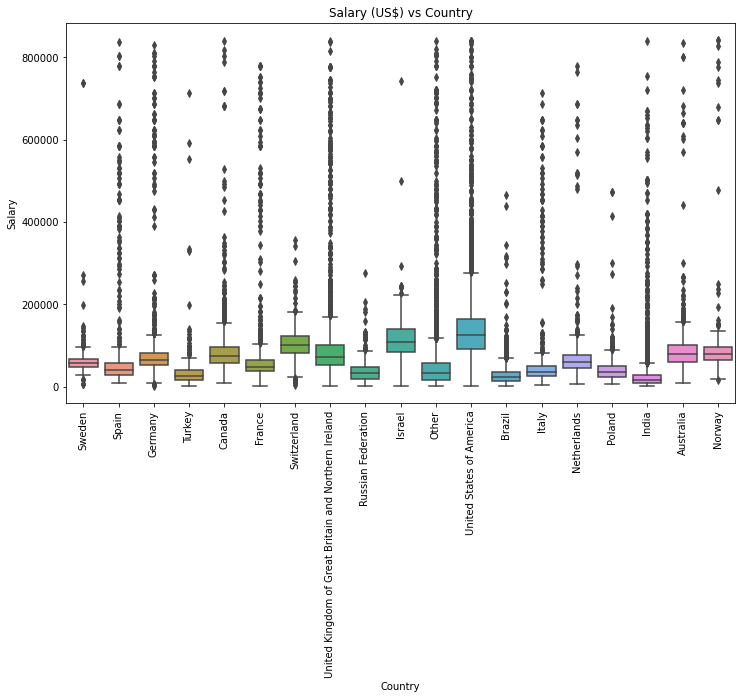

In [181]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Salary',x='Country',data=df)
plt.title('Salary (US$) vs Country')
plt.xticks(rotation=90)
plt.show()

In [182]:
df['YearsCodePro'].value_counts(normalize=True)

3                     0.098524
2                     0.090115
5                     0.087650
4                     0.082569
6                     0.067554
10                    0.060314
7                     0.054851
8                     0.049541
1                     0.047966
Less than 1 year      0.039481
15                    0.035416
9                     0.032011
12                    0.029699
11                    0.026193
20                    0.025838
13                    0.021214
14                    0.017810
16                    0.016107
25                    0.012627
17                    0.011839
21                    0.011356
18                    0.011153
22                    0.010188
23                    0.007698
30                    0.006885
24                    0.006428
19                    0.006097
26                    0.004878
27                    0.003328
35                    0.002972
28                    0.002922
32                    0.002617
29      

In [183]:
df['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '1', '12', '8', '17', '14', '7', '26', '34', '11', '25',
       '24', '22', '13', '9', '20', '23', '39', '27', '35', '30', '19',
       '33', '37', '43', '40', '29', '38', '31', '45', '42', '28', '46',
       '32', '36', '47', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [184]:
def clean_exp(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 50
    else:
        return float(x)

In [185]:
df['YearsCodePro']=df['YearsCodePro'].apply(clean_exp)

In [186]:
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
        1. , 12. ,  8. , 17. , 14. ,  7. , 26. , 34. , 11. , 25. , 24. ,
       22. , 13. ,  9. , 20. , 23. , 39. , 27. , 35. , 30. , 19. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 45. , 42. , 28. , 46. , 32. ,
       36. , 47. , 44. , 41. , 50. , 49. , 48. ])

In [187]:
df['EdLevel'].value_counts(normalize=True)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.493712
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.255481
Some college/university study without earning a degree                                0.114530
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.038109
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.036940
Associate degree (A.A., A.S., etc.)                                                   0.030436
Professional degree (JD, MD, etc.)                                                    0.016514
Something else                                                                        0.009934
Primary/elementary school                                                             0.004344
Name: EdLevel, dtype: float64

In [188]:
def clean_edu(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post graduate'
    else:
        return 'Less than a Bachlor degree'

In [189]:
df['EdLevel'] = df['EdLevel'].apply(clean_edu)

In [190]:
df['EdLevel'].value_counts()

Bachelor’s degree             19433
Master’s degree               10056
Less than a Bachlor degree     7768
Post graduate                  2104
Name: EdLevel, dtype: int64

In [191]:
# Converting education level to numeric value using LabelEncoder fuction to perform ML fitting.
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

df['EdLevel'].unique()

array([2, 0, 1, 3])

In [192]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

df['Country'].unique()

array([14, 13,  4, 16,  2,  3, 15, 17, 12,  6, 10, 18,  1,  7,  8, 11,  5,
        0,  9])

In [193]:
# Separating dataframe columns to set x (independant) and y (target/dependant) variables
x = df.drop('Salary',axis=1)
y = df['Salary']

# Linear Regression model

In [194]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [195]:
type(linear_reg)

sklearn.linear_model._base.LinearRegression

In [196]:
y_pred = linear_reg.predict(x)

In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

error = np.sqrt(mean_squared_error(y,y_pred))

In [198]:
error

82231.3120633879

- Error value is very high in linear regression model

# Decision Tree Regression Model

In [199]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor()

In [200]:
y_pred = dec_tree_reg.predict(x)

In [201]:
error = np.sqrt(mean_squared_error(y,y_pred))
error

74219.36127868154

- Error value reduced. But, still we have error value as high

# Random Forest Regression

In [202]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)

random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [203]:
y_pred = random_forest_reg.predict(x)

In [204]:
error = np.sqrt(mean_squared_error(y,y_pred))
error

74358.08051396458

- Error value still high.

# Using Grid search Cross Validation on regressor

In [205]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12,14,16,20,50,100]
parameters = {'max_depth':max_depth}

regressor =DecisionTreeRegressor(random_state=0)

gs = GridSearchCV(regressor,parameters,scoring = 'neg_mean_squared_error')

gs.fit(x,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 20, 50,
                                       100]},
             scoring='neg_mean_squared_error')

In [206]:
regressor = gs.best_estimator_

regressor.fit(x,y.values)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [207]:
error = np.sqrt(mean_squared_error(y,y_pred))
error

74358.08051396458

In [208]:
x

,Country,EdLevel,YearsCodePro
9,14,2,4.0
11,13,0,5.0
12,4,2,6.0
16,16,0,2.0
17,2,0,6.0
...,...,...,...
83432,2,0,0.5
83434,18,0,5.0
83436,18,1,4.0
83437,2,0,3.0


### Testing the model by giving random data

In [209]:
x_test = np.array([['United States of America',"Master’s degree", 13]])
x_test

array([['United States of America', 'Master’s degree', '13']],
      dtype='<U24')

In [210]:
x_test[:,0] = le_country.transform(x_test[:,0])
x_test[:,1] = le_education.transform(x_test[:,1])
x_test = x_test.astype(float)
x_test

array([[18.,  2., 13.]])

In [211]:
y_pred = regressor.predict(x_test)

d:\Pradeep\Projects\VScode\Projects_Learning_ML\Stackoverflow_devleper_salary_survey_2021\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [212]:
y_pred

array([148725.])

# Save the model using 'pickle' module

In [213]:
import pickle

In [214]:
data = {"model":regressor,"le_country": le_country, "le_education":le_education}

with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

### Checking whehther the saved file is correct

In [215]:
with open('saved_steps.pkl','rb') as r_file:
    r_data = pickle.load(r_file)

In [216]:
regressor_loaded = r_data["model"]
le_country_loaded = r_data["le_country"]
le_education_loaded = r_data["le_education"]

In [217]:
y_pred = regressor_loaded.predict(x_test)
y_pred

d:\Pradeep\Projects\VScode\Projects_Learning_ML\Stackoverflow_devleper_salary_survey_2021\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148725.])